# Metrics examples

Examples of how to use the functions of the module mlnowcasting.utils.metrics

In [1]:
import context
from mlnowcasting.predict import predict
from mlnowcasting.utils.metrics import events_metrics, metric_plots, events_specific_metric,_get_metric_names

/s/chopin/d/proj/jcuomo/699/repository


Let's first get the predictions from 2 different models. (If you just want to test this code run first "How to train a model" so you have a 2nd model for the comparison)

In [2]:
dataset     = 'example_dataset'
model_name1 = 'resConv_16_16'
model_name2 = 'convGRU_16_16'
th_dbz = 20 # reflectivity threshold for computing the metrics
N = 0 # sample from dataset
prediction1, target = predict(dataset, model_name1)
prediction2, target = predict(dataset, model_name2)
prediction1.shape, prediction2.shape

=> loaded checkpoint 'resConv_16_16.th' (trained for 20 epochs)
=> loaded checkpoint 'convGRU_16_16.th' (trained for 300 epochs)


((10, 16, 64, 64), (10, 16, 64, 64))

## Metric plots

In this example I'm plotting both models, and the way to do that is passing the output (fig) as argument of the second.

Samples used: 10
Samples used: 10


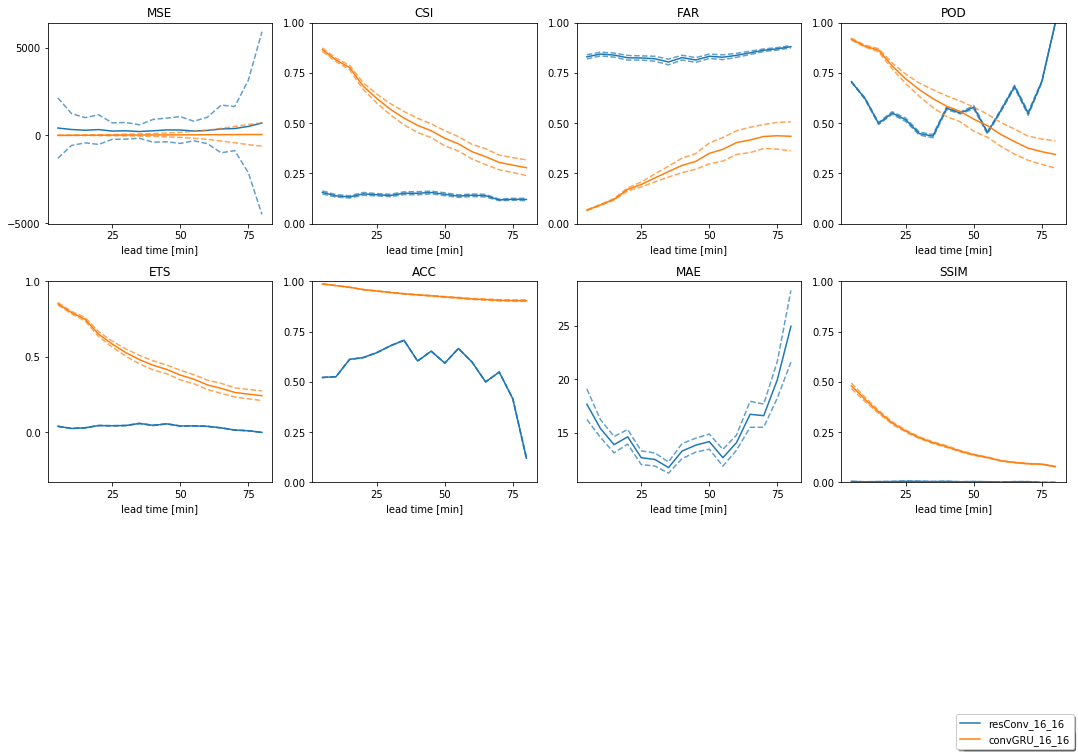

In [3]:
metrics_table1,fig = metric_plots(target, prediction1, time_res=5, th_dbz=th_dbz, std_lines=True, fig=None, model=model_name1);
metrics_table2,fig = metric_plots(target, prediction2, time_res=5, th_dbz=th_dbz, std_lines=True, fig=fig, model=model_name2);
fig

## Metrics with prediction plots

In this example I show how to analyze a particular prediction visualizing the stats (means across batches/frames) and the prediction plots.

Original


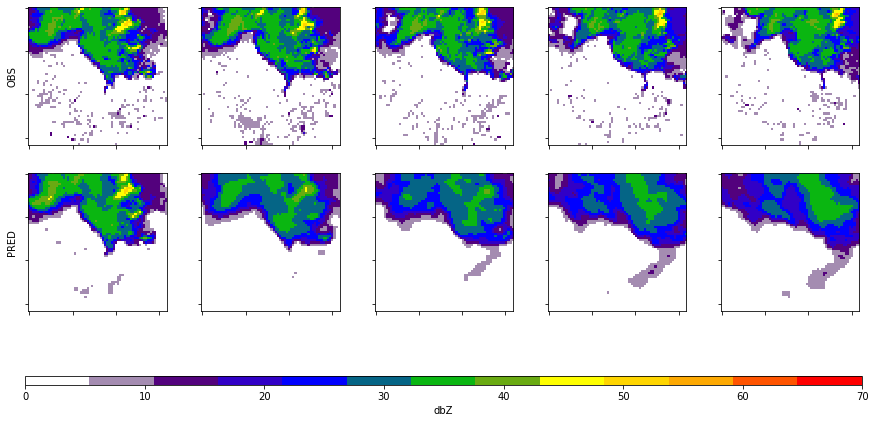

Converted to binary


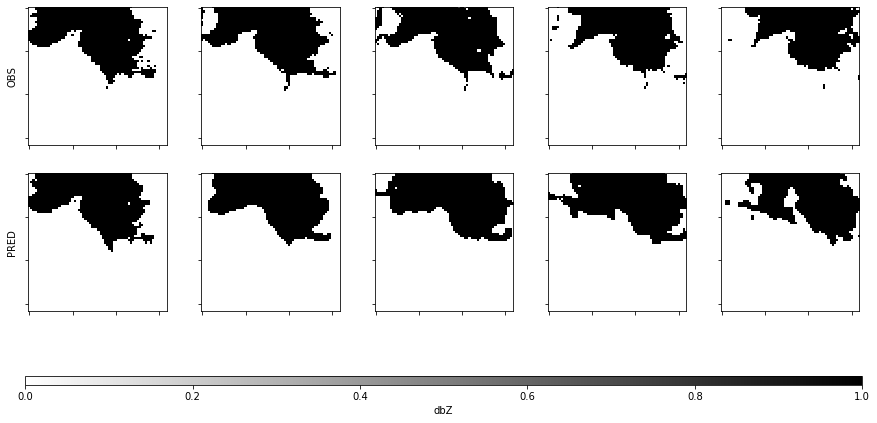

Mean across batches => columns are frames


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
MSE,4.443464,6.878492,10.018591,13.803186,17.440803,21.149106,24.658953,27.839377,30.679509,33.661617,36.619157,40.035536,43.591139,47.221815,50.099156,52.685610
CSI (th=20 dBZ),0.865392,0.814309,0.776179,0.684050,0.622125,0.568634,0.524552,0.488328,0.461736,0.424181,0.396555,0.357562,0.332579,0.304131,0.290553,0.277797
FAR (th=20 dBZ),0.066392,0.092610,0.120736,0.169910,0.194578,0.226983,0.258469,0.289314,0.309247,0.349082,0.369543,0.402840,0.415991,0.433165,0.436909,0.434255
POD (th=20 dBZ),0.917412,0.882997,0.862586,0.784704,0.719524,0.665952,0.621445,0.584081,0.558145,0.519487,0.487106,0.442846,0.407570,0.374673,0.357463,0.343774
ETS (th=20 dBZ),0.851348,0.793283,0.748858,0.649885,0.584364,0.527907,0.481477,0.444095,0.417023,0.379514,0.352044,0.314199,0.291710,0.264717,0.253231,0.242983
ACC (th=20 dBZ),0.986743,0.978735,0.970239,0.958911,0.951782,0.944580,0.937891,0.932642,0.927905,0.922534,0.917773,0.912207,0.909229,0.905615,0.904199,0.903784
MAE,1.265046,1.566683,1.857848,2.160826,2.416603,2.656506,2.883396,3.070565,3.227079,3.405243,3.559211,3.739477,3.902618,4.076998,4.186963,4.350560
SSIM,0.480284,0.412677,0.350647,0.295084,0.254531,0.221938,0.196775,0.177447,0.155265,0.136510,0.123588,0.106674,0.098365,0.092341,0.089840,0.078016





Mean across frames => columns are bacthes


,0,1,2,3,4,5,6,7,8,9
MSE,30.551743,33.226705,48.930147,34.944657,13.057793,27.733278,23.594129,21.768010,14.648927,39.560555
CSI (th=20 dBZ),0.635947,0.529161,0.407066,0.485196,0.656107,0.515300,0.308635,0.238901,0.593154,0.748449
FAR (th=20 dBZ),0.274364,0.130803,0.327350,0.250481,0.095371,0.279627,0.475802,0.646980,0.198771,0.176717
POD (th=20 dBZ),0.824103,0.567297,0.449718,0.539271,0.700616,0.631007,0.398207,0.279129,0.680155,0.886601
ETS (th=20 dBZ),0.569932,0.468265,0.357951,0.447442,0.639282,0.488843,0.290704,0.236603,0.576896,0.671980
ACC (th=20 dBZ),0.911652,0.888657,0.871399,0.919861,0.973953,0.954651,0.953720,0.986465,0.972504,0.920120
MAE,3.119732,3.668349,4.310766,2.945386,1.549523,3.004647,2.745478,2.747845,2.231902,3.879885
SSIM,0.164518,0.234187,0.231618,0.150979,0.124165,0.273249,0.315307,0.195325,0.159049,0.195342





Mean across frames and batches


,1
MSE,28.801594
CSI (th=20 dBZ),0.511792
FAR (th=20 dBZ),0.285626
POD (th=20 dBZ),0.595610
ETS (th=20 dBZ),0.474790
ACC (th=20 dBZ),0.935298
MAE,3.020351
SSIM,0.204374


In [4]:
metrics_table = events_metrics(target, prediction2, th_dbz=th_dbz, plot=True, printT=True, N=N)

### Metric table

Both previous functions return the metric tables.

In [5]:
metrics_table.shape

(8, 16, 10)

The first dimension correspond to the number of metrics. To know which one is each use the following function:

In [6]:
_get_metric_names()

['MSE', 'CSI', 'FAR', 'POD', 'ETS', 'ACC', 'MAE', 'SSIM']

The second dimension corresponds to the number of frames, and the third dimension to the number of events.

## Specific metric

This function is intended to use it for hyperparameter optimization. It returns the average score of the last frame.

In [7]:
events_specific_metric(target, prediction2, metric_name='CSI', th_dbz=th_dbz)

0.27779679609598845